In [26]:
import pandas as pd
import gensim
import nltk
import re
import string

In [125]:
%matplotlib inline

In [254]:
ds_df = pd.read_csv("data/indeed/Bioinformatics_text_data.csv")

In [255]:
ds_df.head()

,Unnamed: 0,job_description,job_location,job_title,sponsored
0,0,"$38,000 - $40,000 a yearJob Summary descriptio...","Mount Arlington, NJ",Entry Level Information Specialist/Non-Clinical,True
1,2,"TwinStrand Biosciences, a Seattle-based genomi...","Seattle, WA",BIOINFORMATICS ENGINEER,True
2,3,Bioinformatics Research ScientistThe candidate...,"Pittsburgh, PA 15203 (Southside Slopes area)",Bioinformatics Research Scientist,True
3,4,Want to be part of a company whose goal is to ...,"South Plainfield, NJ",Bioinformatics Scientist,True
4,5,Paid bioinformatics annotator internships are ...,"McLean, VA 22102",Bioinformatics Internships,False


In [256]:
# Clean up punctuation and make it lower case

doc = list(ds_df.job_description)

punc = re.compile( '[%s]' % re.escape( string.punctuation ) )

clean_vec = [ ]

for d in doc:
    d = d.lower()
    d = punc.sub('', d )
    clean_vec.append(d)
    
ds_df['clean_description'] = clean_vec

In [165]:
ds_df.clean_description.head()

0    contractsr aws data engineerremote project3 mo...
1    at ism connect we believe that success is achi...
2    data engineerdoers wanted dreamers encouragedo...
3    product delivery engineerclearsense is buildin...
4    in this role the candidate will be responsible...
Name: clean_description, dtype: object

In [257]:
salary_pattern = re.compile("^([0-9]+)[ ]*([0-9]*)")

salary = list()

for description in ds_df['clean_description']:
    match_obj = salary_pattern.match(description)
    
    if match_obj is None:
        salary.append(None)
        
    else:
        
        salary_low = match_obj.group(1)
        salary_high = match_obj.group(2)
        
        if salary_high:
            salary.append((int(salary_low) + int(salary_high))//2)
        else:
            salary.append(int(salary_low))
        
ds_df['salary'] = salary

In [258]:
ds_df.loc[:,['clean_description', 'salary']].head(20)

,clean_description,salary
0,38000 40000 a yearjob summary descriptionif y...,39000.0
1,twinstrand biosciences a seattlebased genomics...,NaN
2,bioinformatics research scientistthe candidate...,NaN
3,want to be part of a company whose goal is to ...,NaN
4,paid bioinformatics annotator internships are ...,NaN
5,the stowers institute has an opening for a pro...,NaN
6,3000 5000 a monthparttime contract internship...,4000.0
7,parttime contractunder direct supervision the ...,NaN
8,parttime internshipjob description\r\nwhen you...,NaN
9,parttimefull and part time bioinformatics anno...,NaN


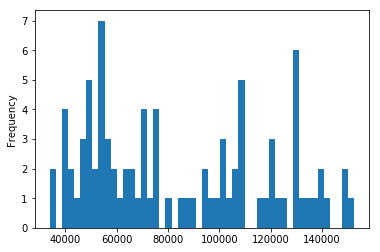

In [260]:
ds_df.salary.plot(kind='hist', bins=50)

In [259]:
ds_df.loc[ds_df['salary'] < 30000, 'salary'] = None

In [261]:
two_state = re.compile("^[A-Za-z \.-]+, ([A-Za-z]{2})")
long_state = re.compile("^[A-Za-z]+, ([A-Za-z]{3-10})")

In [262]:
states = []
for location in ds_df['job_location']:
    state_match = two_state.match(location)
    if state_match:
        states.append(state_match.group(1))
    else:
        states.append(None)
        
ds_df['state'] = states

In [263]:
ds_df.loc[:, ['job_location', 'state']].head(20)
ds_df[ds_df.state.isna()]

,Unnamed: 0,job_description,job_location,job_title,sponsored,clean_description,salary,state
44,49,"TileDB, Inc. leads the development of the open...",Remote,Bioinformatics Software Engineer,False,tiledb inc leads the development of the open s...,NaN,None
65,74,"$70,000 - $100,000 a yearBasepair develops Saa...",Remote,Senior Bioinformatics Scientist,False,70000 100000 a yearbasepair develops saas to ...,85000.0,None
102,114,"$11.50 an hourPart-time, InternshipInterns rec...",California,Intern-Research,False,1150 an hourparttime internshipinterns receive...,NaN,None
180,194,We seek a candidate has experience designing a...,United States,Bioinformatics Scientist II,False,we seek a candidate has experience designing a...,NaN,None
185,199,$12 an hourInternshipOverview\r\nThe Noble Res...,United States,Intern,False,12 an hourinternshipoverview\r\nthe noble rese...,NaN,None
192,206,"$12 an hourTemporary, InternshipOverview\r\nTh...",United States,Lloyd Noble Scholars in Plant Science,False,12 an hourtemporary internshipoverview\r\nthe ...,NaN,None
237,251,"Omega Bioservices, a Norcross based biotech co...",Georgia,Associate Scientist,False,omega bioservices a norcross based biotech com...,NaN,None
252,267,"$47,000 - $60,000 a year (Indeed Est.) Researc...",California,Postdoctoral Associate,False,47000 60000 a year indeed est research associ...,53500.0,None
288,303,Technical analysts will work on client locatio...,United States,Technical Analysts,False,technical analysts will work on client locatio...,NaN,None
372,388,Responsibilities for this position will includ...,United States,Junior Software Engineer,False,responsibilities for this position will includ...,NaN,None


In [264]:
ds_df.to_csv("data/indeed/bioinformatics_clean.csv", index=False)

In [265]:
job = 'bioinformatics'
df = pd.read_csv("data/indeed/" + job + "_clean.csv")
df['search_term'] = job


In [266]:
df.head()

,Unnamed: 0,job_description,job_location,job_title,sponsored,clean_description,salary,state,search_term
0,0,"$38,000 - $40,000 a yearJob Summary descriptio...","Mount Arlington, NJ",Entry Level Information Specialist/Non-Clinical,True,38000 40000 a yearjob summary descriptionif y...,39000.0,NJ,bioinformatics
1,2,"TwinStrand Biosciences, a Seattle-based genomi...","Seattle, WA",BIOINFORMATICS ENGINEER,True,twinstrand biosciences a seattlebased genomics...,NaN,WA,bioinformatics
2,3,Bioinformatics Research ScientistThe candidate...,"Pittsburgh, PA 15203 (Southside Slopes area)",Bioinformatics Research Scientist,True,bioinformatics research scientistthe candidate...,NaN,PA,bioinformatics
3,4,Want to be part of a company whose goal is to ...,"South Plainfield, NJ",Bioinformatics Scientist,True,want to be part of a company whose goal is to ...,NaN,NJ,bioinformatics
4,5,Paid bioinformatics annotator internships are ...,"McLean, VA 22102",Bioinformatics Internships,False,paid bioinformatics annotator internships are ...,NaN,VA,bioinformatics


In [267]:
def _removeNonAscii(s): return "".join(i for i in s if ord(i)<128)

def _removeReturn(col):
    return [re.sub("\\n", " ", item) for item in  [re.sub("\\r", " ", item) for item in col]]
        

In [268]:
job = 'biologist'
df = pd.read_csv("data/indeed/" + job + "_clean.csv")
df['search_term'] = job
df = df.loc[:,['job_title', 'clean_description', 'salary', 'state', 'sponsored', 'search_term' ]]



df['job_title'] = [_removeNonAscii(title) for title in df.job_title ]
df['clean_description'] = [_removeNonAscii(title) for title in df.clean_description ]
df['clean_description'] = _removeReturn(df.clean_description)

df.clean_description[0]

df.to_csv("data/indeed/" + job + "_clean.csv", index=False, encoding='latin1')

In [269]:
df.clean_description[0]

'assay biologist needed to revolutionize cancer diagnosisabout us data driven bioscience is revolutionizing the approach to cancer diagnosis by connecting cancer diagnostic testing with intelligent software we are wellfunded by some of the top venture capital firms in silicon valleythis is an opportunity to create novel assays and to do work that matters you will work closely with an interdisciplinary team you should expect to work hard with a cutting edge teamwe pay a very competitive salary and offer stock ownership of one of the hottest startups anywhereabout you we have 2 separate positions available the first is for a juniorlevel person with either a bs or ms the second is for a more seniorlevel person with a phdyou need to have good handson skills with basic molecular biology techniques prior experience with next generation sequencing is helpful but not necessary we will train you in everything you need to knowyou need to be selfmotivated and driven to change the world of cancer 

In [195]:
print(ds_df.state.describe())

len(ds_df)

count     938
unique     43
top        CA
freq      276
Name: state, dtype: object


961

In [16]:
stop_words = nltk.corpus.stopwords.words( 'english' )

for i in range( 0, len( term_vec ) ):
    term_list = [ ]

    for term in term_vec[ i ]:
        if term not in stop_words:
            term_list.append( term )

    term_vec[ i ] = term_list

In [17]:
# Stem terms
# Porter stem remaining terms

porter = nltk.stem.porter.PorterStemmer()

for i in range( 0, len( term_vec ) ):
    for j in range( 0, len( term_vec[ i ] ) ):
        term_vec[ i ][ j ] = porter.stem( term_vec[ i ][ j ] )

In [18]:
#  Convert term vectors into gensim dictionary

dict = gensim.corpora.Dictionary( term_vec )

corp = [ ]
for i in range( 0, len( term_vec ) ):
    corp.append( dict.doc2bow( term_vec[ i ] ) )

#  Create TFIDF vectors based on term vectors bag-of-word corpora

tfidf_model = gensim.models.TfidfModel( corp )

tfidf = [ ]
for i in range( 0, len( corp ) ):
    tfidf.append( tfidf_model[ corp[ i ] ] )

#  Create pairwise document similarity index

n = len( dict )
index = gensim.similarities.SparseMatrixSimilarity( tfidf_model[ corp ], num_features = n )

#  Print TFIDF vectors and pairwise similarity per document

for i in range( 0, len( tfidf ) ):
    s = 'Doc ' + str( i + 1 ) + ' TFIDF:'

    for j in range( 0, len( tfidf[ i ] ) ):
        s = s + ' (' + dict.get( tfidf[ i ][ j ][ 0 ] ) + ','
        s = s + ( '%.3f' % tfidf[ i ][ j ][ 1 ] ) + ')'


for i in range( 0, len( corp ) ):
    sim = index[ tfidf_model[ corp[ i ] ] ]


In [36]:
important_words = []

for i in range( 0, len( tfidf ) ):
    s = 'Doc ' + str( i + 1 ) + ' TFIDF:'

    for j in range( 0, len( tfidf[ i ] ) ):
        s = s + ' (' + dict.get( tfidf[ i ][ j ][ 0 ] ) + ','
        s = s + ( '%.3f' % tfidf[ i ][ j ][ 1 ] ) + ')'

    print s

AttributeError: 'list' object has no attribute 'shape'

In [ ]:
ds_df.